# **Naive Bayes Classifier**

# Import libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import sklearn  # machine learning

# Import dataset

### For this dataset we are going to use a custom dataset file for the Naive Bayes Classifier. First we need to know how the file is organised. 

In [2]:
# If you are using Google Colab, import the car_evaluation.csv file in the "Files" section
# if you are using a local notebook, make sure the file is in the same folder as the notebook

# Print the 10 first lines of the dataset csv file with Python
# You can also open the file with a text editor

with open('car_evaluation.csv') as f:
    for i in range(10):
        print(f.readline(), end='')

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc


In [3]:
# Load the dataset in a pandas dataframe and see if we can print it
# header=None means that the first line of the csv file is not the header
cars = pd.read_csv('car_evaluation.csv', header=None) 
print(cars)

          0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
...     ...    ...    ...   ...    ...   ...    ...
1732    low    low  5more  more    NaN   med   good
1733    NaN    low  5more  more    med  high  vgood
1734    low    low  5more   NaN    big   low    NaN
1735    low    low  5more  more    NaN   med   good
1736    low    low    NaN  more    big  high  vgood

[1737 rows x 7 columns]


In [4]:
# Rename column names, respectivaly: buying, maint, doors, persons, lug_boot, safety, class
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
cars.columns = col_names

# Print the first 5 lines of the dataframe to see if the column names have been changed
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Exploratory data analysis

In [5]:
# Shape of the dataset (nb of rows and columns)
print(cars.shape)

# Name of the columns
print(cars.columns)

(1737, 7)
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [6]:
# Print dataset info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1736 non-null   object
 1   maint     1737 non-null   object
 2   doors     1735 non-null   object
 3   persons   1734 non-null   object
 4   lug_boot  1735 non-null   object
 5   safety    1736 non-null   object
 6   class     1736 non-null   object
dtypes: object(7)
memory usage: 95.1+ KB


In [7]:
# Description of the cars dataset (mean, std, min, max, quartiles)
print(cars.describe())

       buying maint  doors persons lug_boot safety  class
count    1736  1737   1735    1734     1735   1736   1736
unique      4     4      4       3        3      3      4
top       low   low  5more    more    small    low  unacc
freq      440   441    439     582      579    579   1212


In [8]:
# Name of the 4 different classes
print(cars['class'].unique())

['unacc' 'acc' 'vgood' 'good' nan]


### Missing values in variables

In [9]:
# Number of missing values in each column
print(cars.isnull().sum())

buying      1
maint       0
doors       2
persons     3
lug_boot    2
safety      1
class       1
dtype: int64


In [10]:
# There are missing values in the dataset, lets print them to see what they look like
print(cars[cars.isnull().any(axis=1)])

     buying maint  doors persons lug_boot safety  class
1728    low   low    NaN    more    small    low  unacc
1729    low   low  5more    more    small    NaN    acc
1730    low   low  5more     NaN    small   high   good
1731    low   low  5more     NaN      med    low  unacc
1732    low   low  5more    more      NaN    med   good
1733    NaN   low  5more    more      med   high  vgood
1734    low   low  5more     NaN      big    low    NaN
1735    low   low  5more    more      NaN    med   good
1736    low   low    NaN    more      big   high  vgood


In [11]:
# There are several ways to deal with missing values like:
# dropping them, replacing them with the mean, median or mode of the column, etc.
# Here we will just drop them, as there are only 9 missing values in the dataset

# Drop missing values
cars = cars.dropna()

# Check if there are still missing values
print(cars.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


## Frequency distribution of values in variables

In [12]:
# Print the distribution of each variable values for each class
for col in col_names:
    print(cars[col].value_counts())   

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [13]:
# Count of each target value
print(cars['class'].value_counts(), "\n")

# Same as above but in percentage
print(cars['class'].value_counts(normalize=True), "\n")

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64 



We can see that the dataset in quite imbalanced in terms of its classes, but the number of samples in the first class is much higher than the number of samples in the third class. We will see if this imbalance will affect the performance of the classifier.

We can see that there are no missing values in the dataset.

# Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [14]:
# First, we will check the data types of variables again
cars.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [15]:
# Since the data contains non number values, we need to encode them into numbers
# Since the values are ordinal, we will use ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the encoder
encoder = OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'], ['low', 'med', 'high', 'vhigh'],
                                    ['2', '3', '4', '5more'], ['2', '4', 'more'],
                                    ['small', 'med', 'big'], ['low', 'med', 'high'],
                                    ['unacc', 'acc', 'good', 'vgood']])

# Fit the encoder to the dataset and transform it
cars_en = encoder.fit_transform(cars)

# Print he transformed dataset
print(cars_en)

[[3. 3. 0. ... 0. 0. 0.]
 [3. 3. 0. ... 0. 1. 0.]
 [3. 3. 0. ... 0. 2. 0.]
 ...
 [0. 0. 3. ... 2. 0. 0.]
 [0. 0. 3. ... 2. 1. 2.]
 [0. 0. 3. ... 2. 2. 3.]]


In [16]:
# Put the encoded data into a dataframe
cars_en = pd.DataFrame(cars_en, columns=col_names)

In [17]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
cars_en.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0


In [19]:
cars_en.dtypes

buying      float64
maint       float64
doors       float64
persons     float64
lug_boot    float64
safety      float64
class       float64
dtype: object

## Correlation between variables

In [20]:
# Correlation matrix between all the features
cars_en.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000e+00,-1.356939e-15,-3.433468e-17,-1.530089e-16,-1.045866e-16,-4.082114e-16,-0.282750
maint,-1.356939e-15,1.000000e+00,-2.547345e-16,-4.265105e-17,8.544286e-17,-7.826398e-17,-0.232422
doors,-3.433468e-17,-2.547345e-16,1.000000e+00,1.956599e-17,-2.674488e-18,3.406454e-17,0.066057
persons,-1.530089e-16,-4.265105e-17,1.956599e-17,1.000000e+00,-9.251859e-18,1.137208e-17,0.341707
lug_boot,-1.045866e-16,8.544286e-17,-2.674488e-18,-9.251859e-18,1.000000e+00,1.927471e-18,0.157932
safety,-4.082114e-16,-7.826398e-17,3.406454e-17,1.137208e-17,1.927471e-18,1.000000e+00,0.439337
class,-2.827504e-01,-2.324215e-01,6.605665e-02,3.417068e-01,1.579317e-01,4.393373e-01,1.000000


In [21]:
# Print the most correlated features with the target in absolute value
print(cars_en.corr()['class'].abs().sort_values(ascending=False))

class       1.000000
safety      0.439337
persons     0.341707
buying      0.282750
maint       0.232422
lug_boot    0.157932
doors       0.066057
Name: class, dtype: float64


From the correlation data, we can see that there is no highly correlated variable with the target variable. There are rather multiple variables that are quite correlated with the target. This means that we can use all the variables in the model to predict the target class.

### Visualizing the data

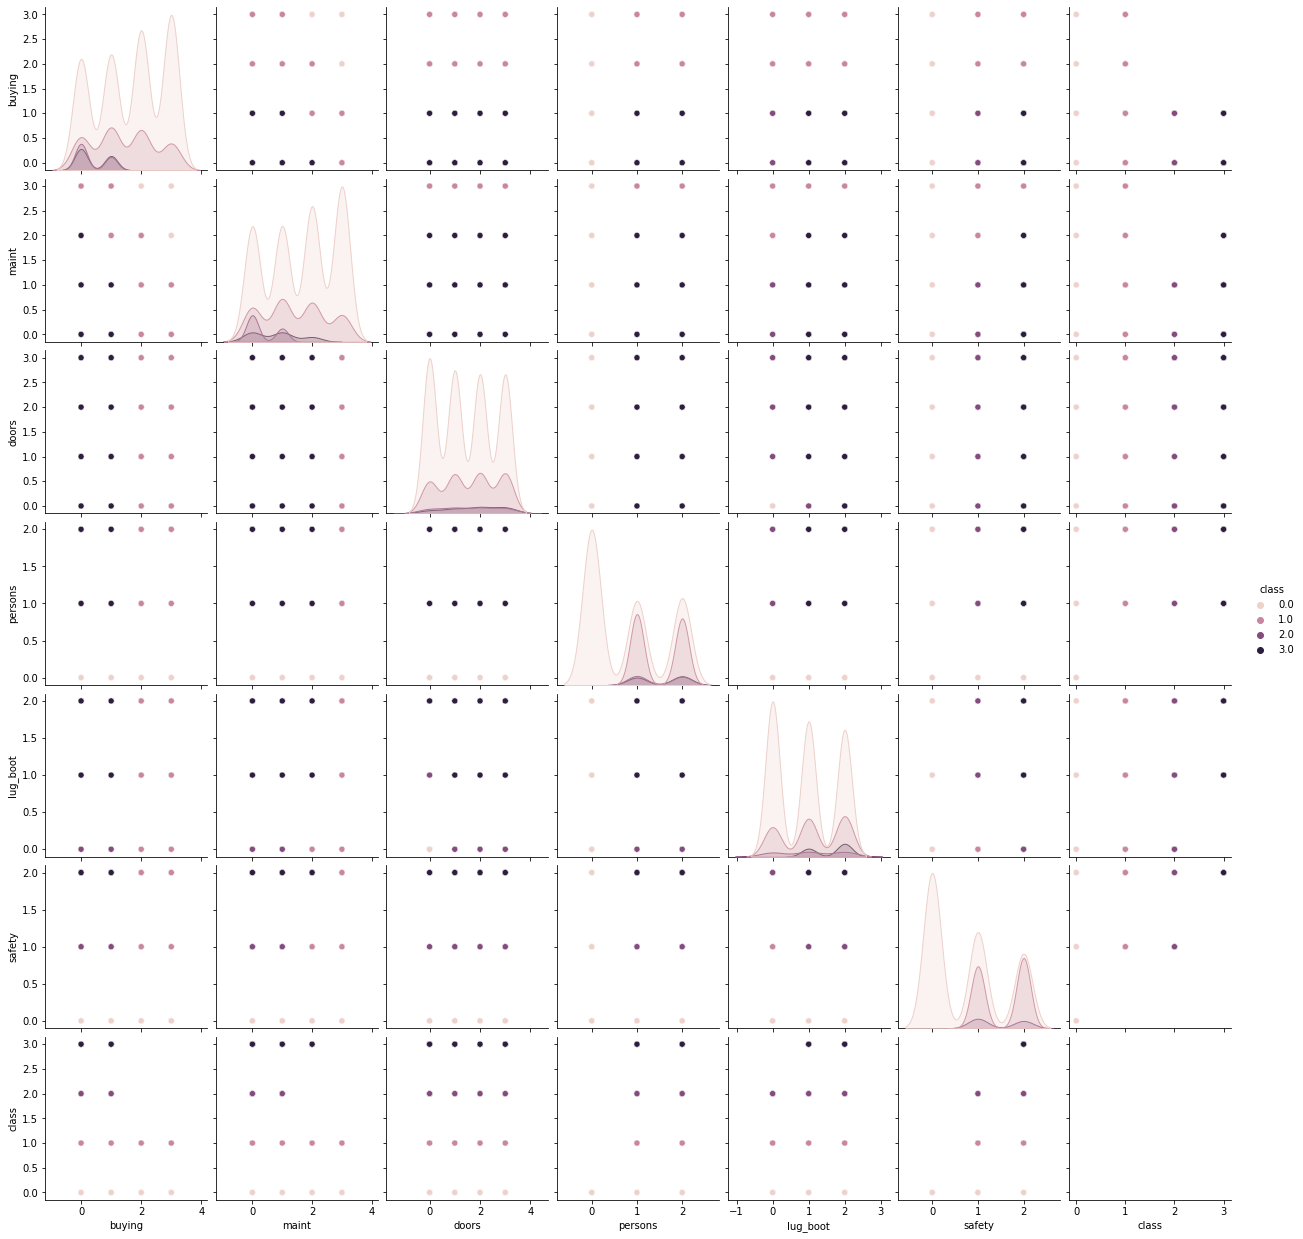

In [22]:
# Pairplot of the most correlated features with the target variable
sns.pairplot(cars_en, hue='class', vars=col_names)
plt.show()

### As we can see the pairplot is not really interesting for ordinal values.

# Split data into separate training and test sets

In [23]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X = cars_en.drop('class', axis=1)
y = cars_en['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
# Check the shapes of each subset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1382, 6) (346, 6)
(1382,) (346,)


In [25]:
# Count the unique values in each of the subsets
print(y_train.value_counts())
print(y_test.value_counts())

0.0    950
1.0    325
2.0     55
3.0     52
Name: class, dtype: int64
0.0    260
1.0     59
2.0     14
3.0     13
Name: class, dtype: int64


# Naive Bayes Model

![naive_bayes](https://miro.medium.com/max/1101/1*0a2wA8H1nbyEXILf0WBcHA.png)

In [26]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
naive_bayes = GaussianNB()

# Train the model using the training sets
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [27]:
from sklearn.metrics import accuracy_score

# Predict the target variable
predictions = naive_bayes.predict(X_test)

# Print the first 20 predictions and the first 20 real values
print(predictions[:20])
print(y_test[:20].values)

# Accuracy of the model on the testing set
print("Testing set score: %f" % accuracy_score(predictions, y_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 3. 0.]
[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Testing set score: 0.736994


# Confusion matrix

A confusion matrix helps summarize the performance of a classification algorithm. A confusion matrix will give a clear picture of the perfomance of a classification model as well as the types of errors produced by the it. <br>
It gives a summary of correct and incorrect predictions broken down by each category. 


Four types of outcomes are possible while evaluating a classification model performance :


**True Positives (TP)** – We predict that an observation belongs to a certain class *x* and the observation actually belongs to that class *x*.


**True Negatives (TN)** – We predict that an observation does not belong to a certain class *x* and the observation actually does not belong to that class *x*.


**False Positives (FP)** – We predict that an observation belongs to a certain class *x* but the observation actually **does not belong** to that class *x*. This type of error is called Type I error.



**False Negatives (FN)** – We predict that an observation does not belong to a certain class *x* but the observation **actually belongs** to that class *x*. This is a very serious error and it is called Type II error.



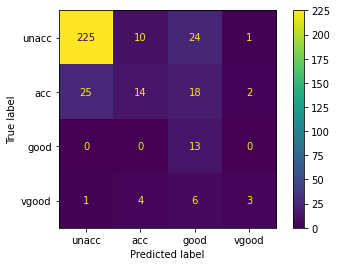

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, predictions,labels=y_test.unique(), normalize=None)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['unacc', 'acc', 'good', 'vgood'])
disp.plot()
plt.show()

In [29]:
print(y_train.value_counts())
print(y_test.value_counts())

0.0    950
1.0    325
2.0     55
3.0     52
Name: class, dtype: int64
0.0    260
1.0     59
2.0     14
3.0     13
Name: class, dtype: int64


# Cross Validation 

In [30]:
from sklearn.model_selection import cross_val_score

# Cross validation with 10 different splits
scores = cross_val_score(naive_bayes, X, cars['class'], cv=10)
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores.std()))

Cross-validation scores: [0.7283237  0.71098266 0.73988439 0.66473988 0.69364162 0.66473988
 0.67630058 0.64739884 0.65697674 0.63953488]
Mean cross-validation score: 0.68
Standard deviation of cross-validation score: 0.03


# Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

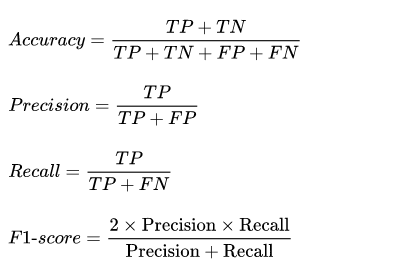


In [31]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       260
         1.0       0.50      0.24      0.32        59
         2.0       0.50      0.21      0.30        14
         3.0       0.21      1.00      0.35        13

    accuracy                           0.74       346
   macro avg       0.53      0.58      0.46       346
weighted avg       0.79      0.74      0.74       346



# One-Hot Encoding
![Image](https://images.deepai.org/glossary-terms/a609ab3c23f948f896657e4304b20ed1/onehot.jpeg)

### The model is not very good, we can try to improve the results by using another encoding method

In [32]:
# train test split
X = cars.drop('class', axis=1)
y = cars['class']

# One hot encoding
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the dataset and transform it
X_en = encoder.fit_transform(X)

# Print the transformed dataset
print(X_en)

# Print the shape of the encoded dataset
print(X_en.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]]
(1728, 21)


In [33]:
# encode the target variable with a label encoder
from sklearn.preprocessing import LabelEncoder

# Create an instance of the encoder
encoder = LabelEncoder()

# Fit the encoder to the dataset and transform it
y_en = encoder.fit_transform(y)

# Print the transformed dataset
print(y_en)

# Dataframe with the encoded target variable
cars_2 = pd.DataFrame(X_en)
cars_2['class'] = y_en

cars_2.corr()['class'].abs().sort_values(ascending=False)

[2 2 2 ... 2 1 3]


class    1.000000
12       0.360750
19       0.360750
13       0.202805
20       0.198599
18       0.162150
14       0.157945
3        0.074782
7        0.074782
2        0.051890
6        0.051890
8        0.039680
17       0.036916
0        0.035102
15       0.020561
5        0.016788
16       0.016355
10       0.013736
11       0.013736
9        0.012209
1        0.012209
4        0.006105
Name: class, dtype: float64

In [34]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_en, y, test_size=0.2, random_state=1)

# Check the shapes of each subset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1382, 21) (346, 21)
(1382,) (346,)


In [35]:
# Create a Gaussian Classifier
naive_bayes = GaussianNB()

# Train the model using the training sets
naive_bayes.fit(X_train, y_train)

# Predict the target variable
predictions = naive_bayes.predict(X_test)

# Print the first 9 predictions and the first 9 real values
print(predictions[:9])
print(y_test[:9].values)

['unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'good']
['unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc']


In [36]:
# Accuracy of the model on the testing set
print("Testing set score: %f" % accuracy_score(predictions, y_test))

Testing set score: 0.838150


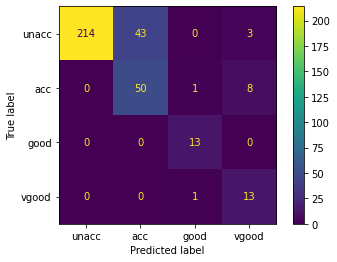

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions,
                      labels=y_test.unique(), normalize=None)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['unacc', 'acc', 'good', 'vgood'])
disp.plot()
plt.show()

In [38]:
# Cross validation with 10 different splits
scores = cross_val_score(naive_bayes, X_en, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores.std()))

Cross-validation scores: [0.69364162 0.70520231 0.89017341 0.69364162 0.88439306 0.8265896
 0.73988439 0.8150289  0.91860465 0.86046512]
Mean cross-validation score: 0.80
Standard deviation of cross-validation score: 0.08


In [39]:
# Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         acc       0.54      0.85      0.66        59
        good       0.54      0.93      0.68        14
       unacc       1.00      0.82      0.90       260
       vgood       0.87      1.00      0.93        13

    accuracy                           0.84       346
   macro avg       0.74      0.90      0.79       346
weighted avg       0.90      0.84      0.85       346



The results are much better, there are much less prediction errors, and there are closer to the actual **ordinal** results.
Yet, we can do better. Try to improve the results by tuning the hyperparameters of the model, another encoding method, or another classifier method.

# References : 
1. https://scikit-learn.org/
2. https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41